Knn Iris Dataset

In [14]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

df = iris.frame

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

print("Información del DataFrame:")
print(df.info())

print("\nDescripción del DataFrame:")
print(df.describe())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

Descripción del DataFrame:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35000

In [17]:
df["sepal_width_iris"] = pd.qcut(df['sepal width (cm)'], 4, retbins=False, labels=[1, 2, 3, 4])
df["sepal_width_iris"]


0      4
1      2
2      3
3      3
4      4
      ..
145    2
146    1
147    2
148    4
149    2
Name: sepal_width_iris, Length: 150, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [18]:
y = df['sepal_width_iris']
X = df.drop(['sepal_width_iris','sepal width (cm)','petal width (cm)','sepal length (cm)','target'], axis = 1)

In [19]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[-1.39338902],
       [-1.33550342],
       [ 0.74837808],
       [ 0.4010645 ],
       [ 0.51683569],
       [-1.45127462],
       [-1.33550342],
       [-0.06202028],
       [ 0.74837808],
       [ 0.97992047],
       [ 0.3431789 ],
       [ 1.32723405],
       [ 0.2274077 ],
       [ 1.61666204],
       [ 0.4010645 ],
       [-1.39338902],
       [ 1.67454764],
       [ 0.16952211],
       [-1.39338902],
       [-1.45127462],
       [-1.10396103],
       [-0.17779148],
       [ 0.63260689],
       [-1.10396103],
       [-1.27761783],
       [-1.21973223],
       [ 0.2274077 ],
       [-1.33550342],
       [ 0.2274077 ],
       [ 1.67454764],
       [-1.39338902],
       [ 0.2852933 ],
       [ 0.69049248],
       [-1.39338902],
       [ 0.57472129],
       [ 0.74837808],
       [ 0.11163651],
       [ 0.4010645 ],
       [ 0.92203487],
       [ 0.11163651],
       [-1.21973223],
       [-0.29356267],
       [ 0.86414927],
       [-1.39338902],
       [-1.50916022],
       [-0

In [22]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.42105263157894735


Esto significa que el modelo está clasificando correctamente aproximadamente el 42.11% de los casos de prueba.
Este valor de precisión no es muy alto, lo que indica que el modelo KNN podría no estar siendo muy efectivo en la clasificación de los datos de prueba.

              precision    recall  f1-score   support

           1       0.40      0.55      0.46        11
           2       0.00      0.00      0.00         7
           3       0.14      0.10      0.12        10
           4       0.60      0.90      0.72        10

    accuracy                           0.42        38
   macro avg       0.29      0.39      0.32        38
weighted avg       0.31      0.42      0.35        38



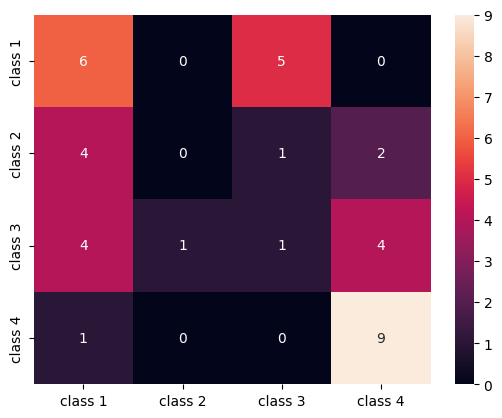

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes_names = ['class 1','class 2','class 3','class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

Según el reporte y la matriz, el modelo KNN parece tener un rendimiento desequilibrado, con un sesgo hacia la clase 4 y problemas para clasificar correctamente las clases 2 y 3. Esto podría deberse a varias razones, como un desbalance de clases en el conjunto de datos, una mala elección del valor de k o un problema con la selección de características.
La matriz de confusión muestra cómo se distribuyen las predicciones del modelo en comparación con los valores reales. La diagonal principal indica los aciertos de clasificación, mientras que los valores fuera de la diagonal muestran los errores.
En general, se observa que el modelo está teniendo dificultades con las clases 2 y 3, clasificando la mayoría de los ejemplos de estas clases en otras categorías.
La clase 4 tiene un alto nivel de precisión, lo que sugiere que el modelo está sesgado hacia esa clase.

None 0.8133333333333334


c:\Users\Daniela Florez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Daniela Florez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


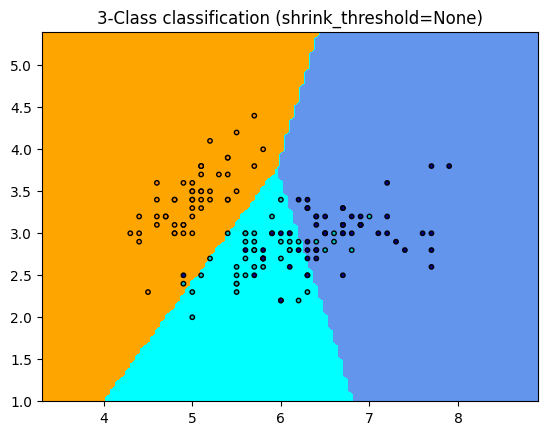

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

iris = load_iris()
X = iris.data
y = iris.target
X_2d = X[:, [0, 1]]
y = iris.target


# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()


Este resultado es bastante bueno, especialmente si consideramos que solo se están utilizando dos características (sepal length y sepal width) para realizar la clasificación.

In [27]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

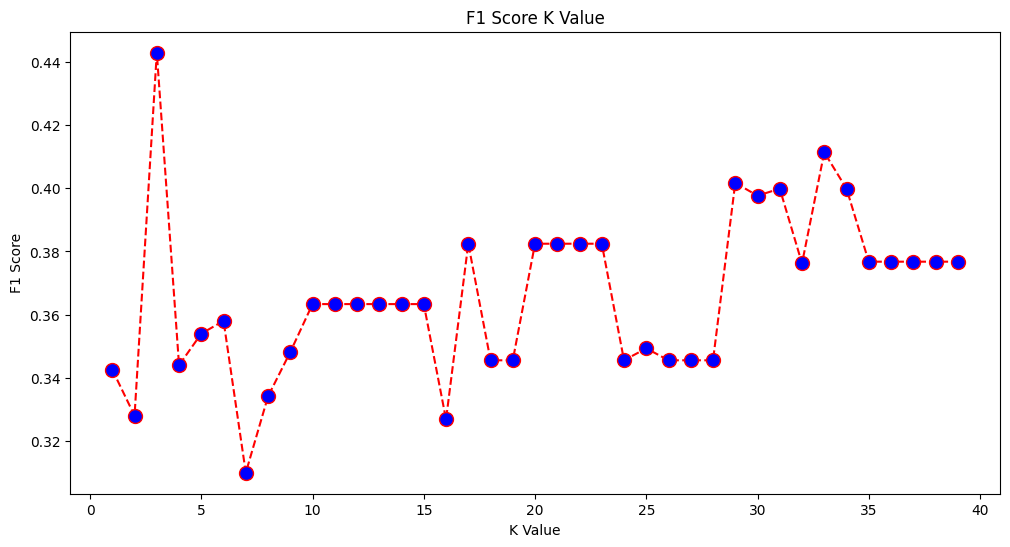

In [28]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

El valor de k = 3 ofrece el mejor F1-score, lo que sugiere que este valor es el más adecuado para el modelo en este conjunto de datos. Los valores más bajos o más altos de k tienden a tener un rendimiento inferior.
Un F1-score de 0.44 es relativamente bajo, lo que indica que el modelo tiene dificultades para clasificar correctamente los datos de prueba en todas las clases. Puede ser útil investigar las razones detrás de este bajo rendimiento.
Dado que el F1-score máximo es bajo, se puede considerar hacer lo siguiente para mejorar el rendimiento del modelo:
- Probar otros valores de k en un rango más amplio para ver si hay algún otro valor que mejore el rendimiento.
- Experimentar con diferentes combinaciones de características para el modelo.
- Verificar si los datos necesitan normalización o estandarización.

In [29]:
classifier15 = KNeighborsClassifier(n_neighbors=3)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.54      0.64      0.58        11
           2       0.17      0.14      0.15         7
           3       0.40      0.20      0.27        10
           4       0.57      0.80      0.67        10

    accuracy                           0.47        38
   macro avg       0.42      0.44      0.42        38
weighted avg       0.44      0.47      0.44        38



Aún hay problemas significativos para clasificar correctamente las clases 2 y 3, y el rendimiento en general es bajo.

Con base en los resultados del KNN y sus evaluaciones métricas, se puede resaltar que el informe de clasificación muestra que el modelo tiene dificultades para clasificar correctamente algunas clases, especialmente las clases 2 y 3, mientras que tiene un mejor rendimiento con las clases 1 y 4. Esto sugiere que el modelo puede estar sesgado hacia ciertas clases.
Por otro lado, la precisión global de los modelos ha estado entre el 42% y el 47%, lo cual es moderado a bajo, indicando que los modelos KNN podrían no estar clasificando los datos de manera efectiva.
Al probar el modelo KNN con diferentes valores de k, parece que k = 3 ofrece el mejor rendimiento. Sin embargo, sería bueno experimentar con otros valores de k para ver si hay mejoras adicionales.